In [1]:
import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt

from scipy import signal

import seaborn as sns

In [39]:
# Your time series data array
data = pd.read_csv('raw_data/MEFAR/subject_1/2.evening/ACC.csv', dtype="float", names=["x", "y", "z"])

In [29]:
data

,x,y,z
0,1.675167e+09,1.675167e+09,1.675167e+09
1,3.200000e+01,3.200000e+01,3.200000e+01
2,-2.000000e+00,1.700000e+01,6.000000e+01
3,-2.000000e+00,1.700000e+01,6.100000e+01
4,-3.000000e+00,1.700000e+01,6.300000e+01
...,...,...,...
62289,2.300000e+01,2.100000e+01,5.600000e+01
62290,2.300000e+01,2.100000e+01,5.600000e+01
62291,2.300000e+01,2.100000e+01,5.600000e+01
62292,2.300000e+01,2.000000e+01,5.600000e+01


<Axes: ylabel='x'>

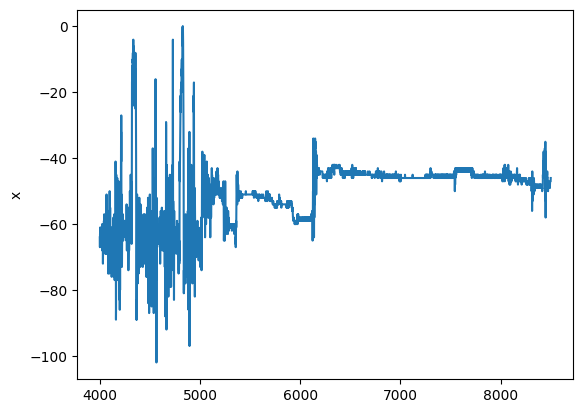

In [40]:
sns.lineplot(data["x"][4000:8500])

In [41]:
data = data["x"][4000:8500]

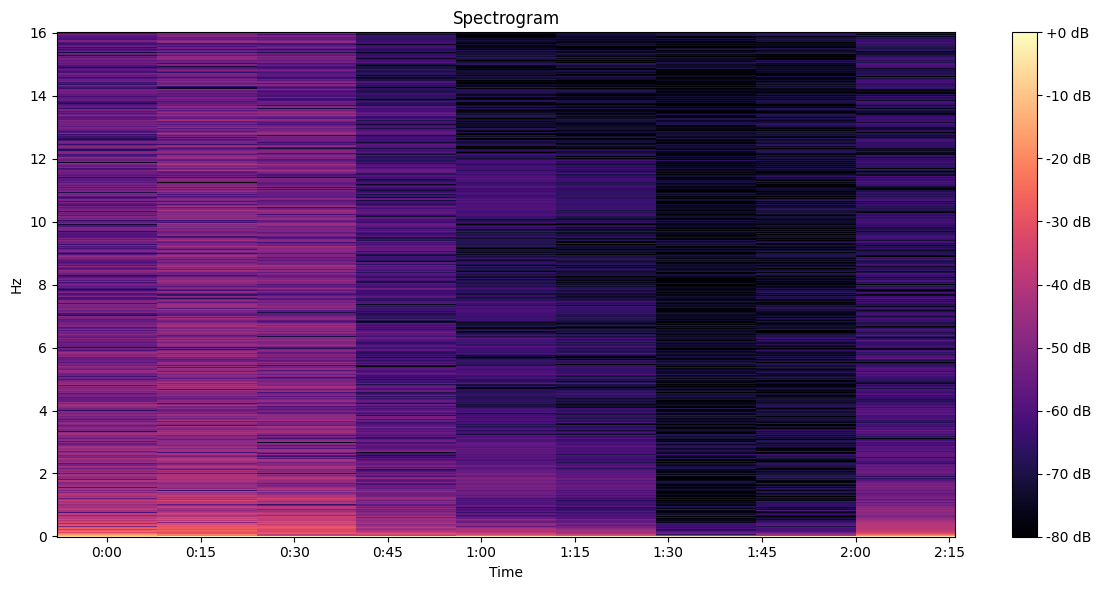

In [43]:

data = data.to_numpy(dtype="float")

data = data.reshape(-1)  # Flatten the array to a 1D array

sampling_rate = 32  # The frequency of your data array (32 Hz)

# Compute the Short-Time Fourier Transform (STFT)
stft = librosa.stft(data)

# Convert the STFT to a spectrogram (magnitude of STFT)
spectrogram = np.abs(stft)

# Display the spectrogram as an image
plt.figure(figsize=(12, 6))
librosa.display.specshow(librosa.amplitude_to_db(spectrogram, ref=np.max), sr=sampling_rate, x_axis='time', y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.tight_layout()
plt.show()

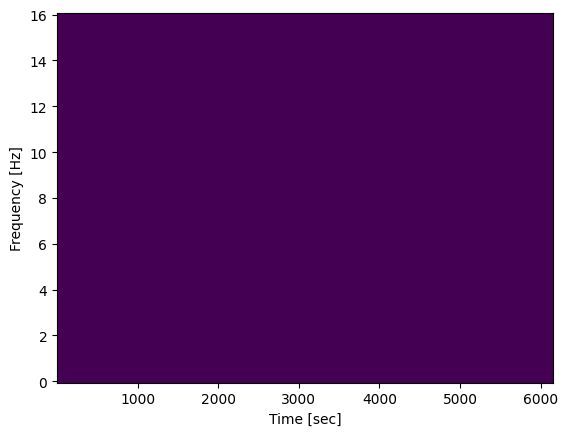

In [80]:
f, t, Sxx = signal.spectrogram(data, sampling_rate)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()